<h1><center>Analyse de sentiments sur les tweets</center></h1>

<html>
    <h3>Importation des bibliothèques nécessaires</h3>
<ul>
    <li>Importation de la bibliothèque pandas pour la manipulation et l'analyse des données</li>
    <li>Importation de MongoClient depuis la bibliothèque pymongo pour interagir avec MongoDB</li>
    <li>Importation de la bibliothèque seaborn pour la visualisation avancée des données</li>
    <li>Importation de la bibliothèque missingno pour visualiser les motifs de données manquantes</li>
    <li>Importation du module string pour les opérations sur les chaînes de caractères</li>
    <li>Importation du module re pour les expressions régulières</li>
    <li>Importation de la bibliothèque NLTK pour les tâches de traitement du langage naturel</li>
    <li>Importation de la fonction word_tokenize pour la tokenisation</li>
    <li>Importation de stopwords depuis le corpus NLTK pour le prétraitement du texte</li>
    <li>Importation de la bibliothèque matplotlib pour les tracés</li>
    <li>Importation de pipeline depuis la bibliothèque transformers pour diverses tâches de TALN</li>
 </ul>
</html>

In [2]:
import pandas as pd
from pymongo import MongoClient
import seaborn as sb
import missingno as msno
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from transformers import pipeline


2024-05-06 21:09:44.547044: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-06 21:09:44.708789: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-06 21:09:47.572309: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# I - Prétraitement des données

### Initialise un client pour interagir avec la base de données MongoDB nommée 'tweets_db' et une collection nommée 'tweets'.

In [3]:
client = MongoClient()
db = client['tweets_db']
collection = db['tweets']

### Récupère tous les documents

In [4]:
cursor = collection.find()
for document in cursor:
    print(document)

{'_id': ObjectId('6637b4ba28e662f0e0d3db56'), 'content': 'Who are we playing next?', 'date': '2024-05-05T16:32:50.000Z', 'likes': 0, 'ret': 0}
{'_id': ObjectId('6637b4ba28e662f0e0d3db57'), 'content': 'The Rock', 'date': '2024-05-05T16:32:50.000Z', 'likes': 0, 'ret': 0}
{'_id': ObjectId('6637b4ba28e662f0e0d3db58'), 'content': 'GoodAfternoon', 'date': '2024-05-05T16:32:50.000Z', 'likes': 0, 'ret': 0}
{'_id': ObjectId('6637b4ba28e662f0e0d3db59'), 'content': 'kermit is the better dresser \n@JimHensonMuppet', 'date': '2024-05-05T16:32:50.000Z', 'likes': 0, 'ret': 0}
{'_id': ObjectId('6637b4ba28e662f0e0d3db5a'), 'content': '“The Pope shall be for the west, and you shall be for us, you shall be for us!”', 'date': '2024-05-05T16:32:50.000Z', 'likes': 0, 'ret': 0}
{'_id': ObjectId('6637b4bb28e662f0e0d3db5b'), 'content': 'W.T.A.F \n\nAre these guys climbing mountains in training?? ', 'date': '2024-05-05T16:32:50.000Z', 'likes': 0, 'ret': 0}
{'_id': ObjectId('6637b4bb28e662f0e0d3db5c'), 'content'

### Convertir les tweets en minuscules

In [5]:
# convertion les tweets en mniscules
df=pd.DataFrame(list(db['tweets'].find()))
df_initial=df.copy()
df['content']=df['content'].apply(lambda x: x.lower())
df

,_id,content,date,likes,ret
0,6637b4ba28e662f0e0d3db56,who are we playing next?,2024-05-05T16:32:50.000Z,0,0
1,6637b4ba28e662f0e0d3db57,the rock,2024-05-05T16:32:50.000Z,0,0
2,6637b4ba28e662f0e0d3db58,goodafternoon,2024-05-05T16:32:50.000Z,0,0
3,6637b4ba28e662f0e0d3db59,kermit is the better dresser \n@jimhensonmuppet,2024-05-05T16:32:50.000Z,0,0
4,6637b4ba28e662f0e0d3db5a,"“the pope shall be for the west, and you shall...",2024-05-05T16:32:50.000Z,0,0
...,...,...,...,...,...
160,6637b5a628e662f0e0d3dbf7,"same, put it on wax",2024-05-05T16:32:50.000Z,2,0
161,6637b5a628e662f0e0d3dbf8,metro tweeting is cornyyyyyy as hell to me idk,2024-05-05T15:48:12.000Z,0,0
162,6637b5a628e662f0e0d3dbf9,"yeah it changed , so screwed up",2024-05-05T16:32:50.000Z,0,0
163,6637b5a628e662f0e0d3dbfa,ratna's next series (her biopic) on netflix ti...,2024-05-05T16:32:50.000Z,0,0


<Axes: >

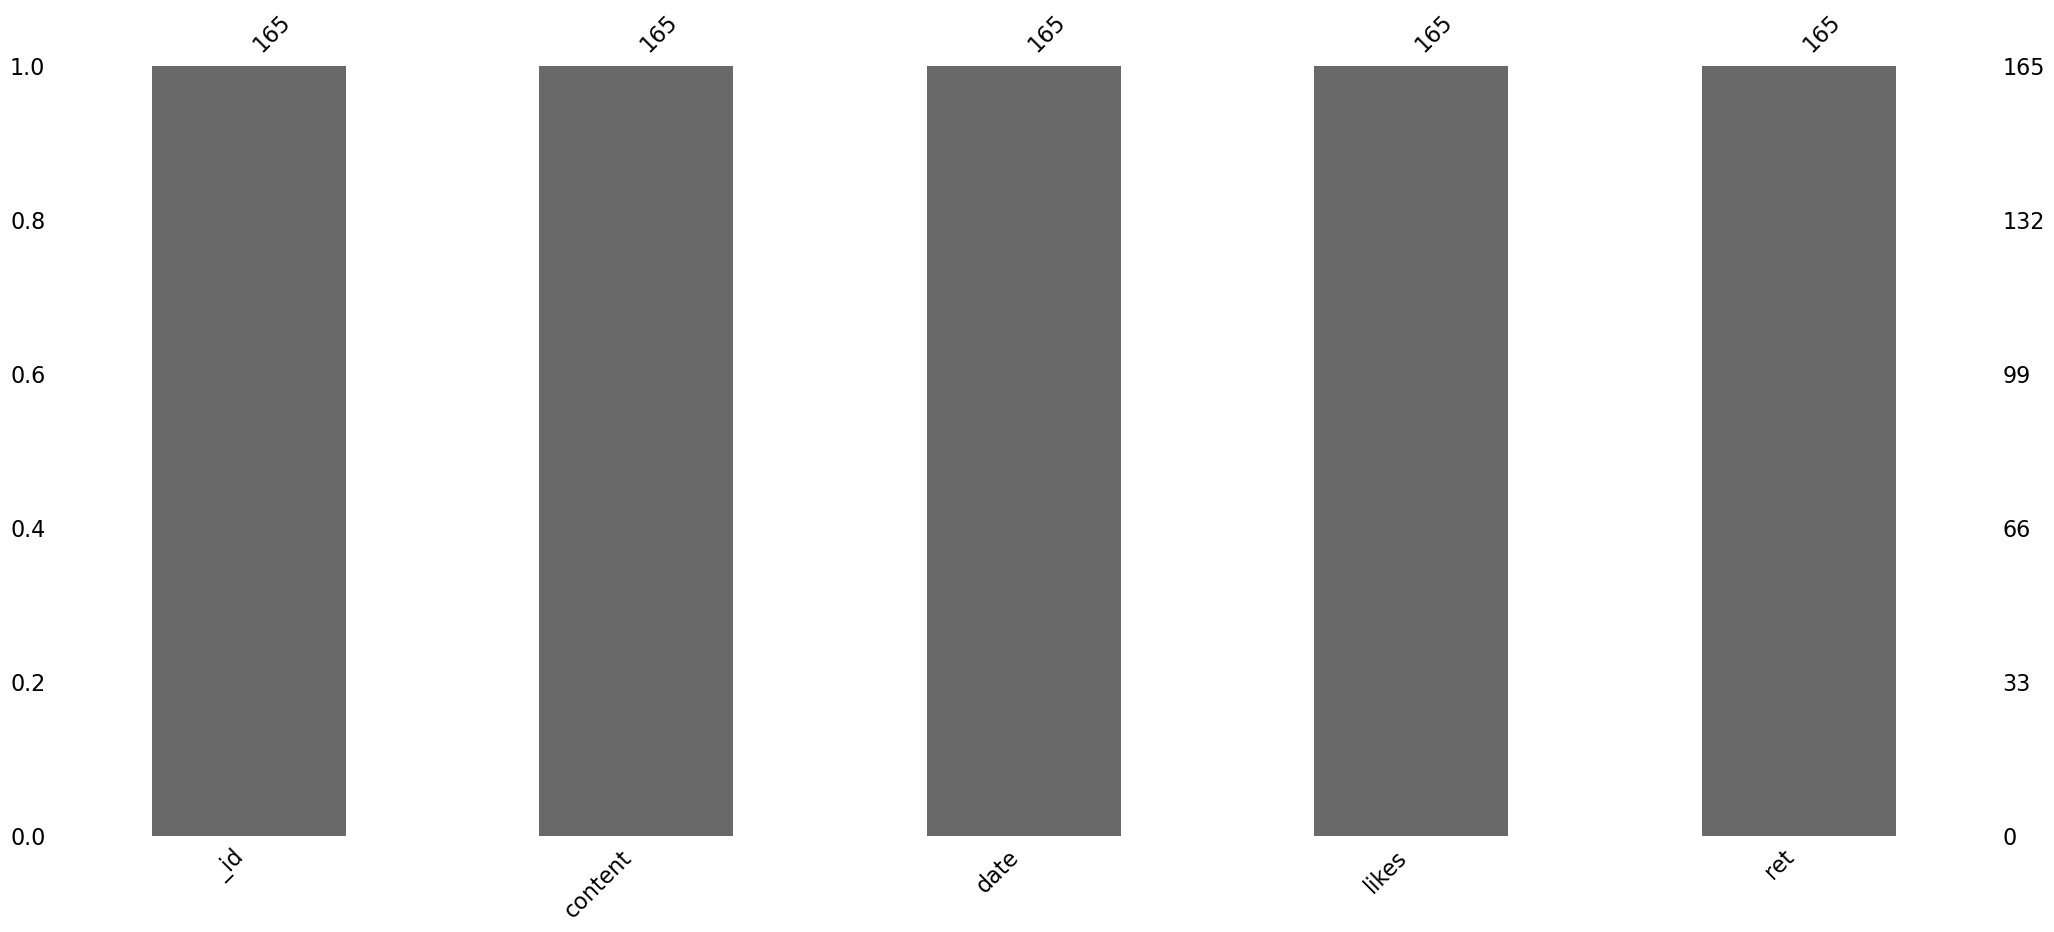

In [6]:
msno.bar(df)

In [8]:
# from matplotlib.pylab import plt
# for tmp in list(df.columns):
#     plt.plot(df[tmp])
#     plt.title('Histogram of "'+str(tmp)+'"')
#     plt.show()

### Enlever les ponctuations

In [7]:
def remove_punct(text):
    nopunct = "".join([char for char in text if char not in string.punctuation])
    return nopunct

df['content'] = df['content'].apply(lambda x: remove_punct(x))
df

,_id,content,date,likes,ret
0,6637b4ba28e662f0e0d3db56,who are we playing next,2024-05-05T16:32:50.000Z,0,0
1,6637b4ba28e662f0e0d3db57,the rock,2024-05-05T16:32:50.000Z,0,0
2,6637b4ba28e662f0e0d3db58,goodafternoon,2024-05-05T16:32:50.000Z,0,0
3,6637b4ba28e662f0e0d3db59,kermit is the better dresser \njimhensonmuppet,2024-05-05T16:32:50.000Z,0,0
4,6637b4ba28e662f0e0d3db5a,“the pope shall be for the west and you shall ...,2024-05-05T16:32:50.000Z,0,0
...,...,...,...,...,...
160,6637b5a628e662f0e0d3dbf7,same put it on wax,2024-05-05T16:32:50.000Z,2,0
161,6637b5a628e662f0e0d3dbf8,metro tweeting is cornyyyyyy as hell to me idk,2024-05-05T15:48:12.000Z,0,0
162,6637b5a628e662f0e0d3dbf9,yeah it changed so screwed up,2024-05-05T16:32:50.000Z,0,0
163,6637b5a628e662f0e0d3dbfa,ratnas next series her biopic on netflix title...,2024-05-05T16:32:50.000Z,0,0


### Supprimer les emojis

In [8]:
def supprimer_emojis(texte):
    # Expression régulière pour correspondre aux emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    # Remplacer les emojis par une chaîne vide
    texte_sans_emojis = emoji_pattern.sub(r'', texte)
    return texte_sans_emojis

df['content'] = df['content'].apply(lambda x: supprimer_emojis(x))
df.head()

,_id,content,date,likes,ret
0,6637b4ba28e662f0e0d3db56,who are we playing next,2024-05-05T16:32:50.000Z,0,0
1,6637b4ba28e662f0e0d3db57,the rock,2024-05-05T16:32:50.000Z,0,0
2,6637b4ba28e662f0e0d3db58,goodafternoon,2024-05-05T16:32:50.000Z,0,0
3,6637b4ba28e662f0e0d3db59,kermit is the better dresser \njimhensonmuppet,2024-05-05T16:32:50.000Z,0,0
4,6637b4ba28e662f0e0d3db5a,“the pope shall be for the west and you shall ...,2024-05-05T16:32:50.000Z,0,0


<html>
    <h3>la tokenisation</h3><hr>
    Téléchargement des données du tokenizer <span style="color:blue">'punkt'</span> de <span style="color:red">NLTK</span>.
Ce jeu de données comprend des tokenizers pré-entraînés utilisés par <span style="color:red">NLTK</span> pour la tokenisation des mots.
</html>

In [9]:
nltk.download('punkt')
def tokenize(text):
    tokens = word_tokenize(text)
    return tokens
df['content'] = df['content'].apply(lambda x: tokenize(x))

df.head()

[nltk_data] Downloading package punkt to /home/abderrahim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,_id,content,date,likes,ret
0,6637b4ba28e662f0e0d3db56,"[who, are, we, playing, next]",2024-05-05T16:32:50.000Z,0,0
1,6637b4ba28e662f0e0d3db57,"[the, rock]",2024-05-05T16:32:50.000Z,0,0
2,6637b4ba28e662f0e0d3db58,[goodafternoon],2024-05-05T16:32:50.000Z,0,0
3,6637b4ba28e662f0e0d3db59,"[kermit, is, the, better, dresser, jimhensonmu...",2024-05-05T16:32:50.000Z,0,0
4,6637b4ba28e662f0e0d3db5a,"[“, the, pope, shall, be, for, the, west, and,...",2024-05-05T16:32:50.000Z,0,0


Création d'une liste de mots vides (stopwords) en anglais en utilisant le corpus fourni par NLTK.

In [10]:
stopwords_En = nltk.corpus.stopwords.words('english')
# stopwords_En

supprimer les mots vides (stopwords) d'une liste de tokens

In [11]:
# import nltk
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords_En]
    return text

df['content'] = df['content'].apply(lambda x: remove_stopwords(x))
df.head()

,_id,content,date,likes,ret
0,6637b4ba28e662f0e0d3db56,"[playing, next]",2024-05-05T16:32:50.000Z,0,0
1,6637b4ba28e662f0e0d3db57,[rock],2024-05-05T16:32:50.000Z,0,0
2,6637b4ba28e662f0e0d3db58,[goodafternoon],2024-05-05T16:32:50.000Z,0,0
3,6637b4ba28e662f0e0d3db59,"[kermit, better, dresser, jimhensonmuppet]",2024-05-05T16:32:50.000Z,0,0
4,6637b4ba28e662f0e0d3db5a,"[“, pope, shall, west, shall, us, shall, us, ”]",2024-05-05T16:32:50.000Z,0,0


### Lemmatizer (Un "lemmatizer" est un outil qui transforme les mots d'une phrase en leur forme canonique)

Initialisation d'un objet de la classe PorterStemmer de NLTK.

In [12]:
ps = nltk.PorterStemmer()

définit une fonction appelée stemming qui utilise un objet ps de type PorterStemmer pour appliquer la racinisation (stemming) à une liste de tokens. 

In [13]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

df['content_1'] = df['content'].apply(lambda x: stemming(x))

df.head()


,_id,content,date,likes,ret,content_1
0,6637b4ba28e662f0e0d3db56,"[playing, next]",2024-05-05T16:32:50.000Z,0,0,"[play, next]"
1,6637b4ba28e662f0e0d3db57,[rock],2024-05-05T16:32:50.000Z,0,0,[rock]
2,6637b4ba28e662f0e0d3db58,[goodafternoon],2024-05-05T16:32:50.000Z,0,0,[goodafternoon]
3,6637b4ba28e662f0e0d3db59,"[kermit, better, dresser, jimhensonmuppet]",2024-05-05T16:32:50.000Z,0,0,"[kermit, better, dresser, jimhensonmuppet]"
4,6637b4ba28e662f0e0d3db5a,"[“, pope, shall, west, shall, us, shall, us, ”]",2024-05-05T16:32:50.000Z,0,0,"[“, pope, shall, west, shall, us, shall, us, ”]"


combinant les mots racinisés de chaque ligne de la colonne 'content_1' du DataFrame df en une seule chaîne de caractères par ligne

In [14]:
L=[]
for tmp in df['content_1']:
    text=""
    if len(tmp)!=0 and isinstance(tmp[0],str):
        text=tmp[0]
    for x in tmp[1:]:
        if isinstance(x,str):
            text+=" "+x
    L.append(text)
# L

Assigner les phrases combinées de la liste L à la colonne 'content_1'

In [16]:
df['content_1'] = L
df

,_id,content,date,likes,ret,content_1
0,6637b4ba28e662f0e0d3db56,"[playing, next]",2024-05-05T16:32:50.000Z,0,0,play next
1,6637b4ba28e662f0e0d3db57,[rock],2024-05-05T16:32:50.000Z,0,0,rock
2,6637b4ba28e662f0e0d3db58,[goodafternoon],2024-05-05T16:32:50.000Z,0,0,goodafternoon
3,6637b4ba28e662f0e0d3db59,"[kermit, better, dresser, jimhensonmuppet]",2024-05-05T16:32:50.000Z,0,0,kermit better dresser jimhensonmuppet
4,6637b4ba28e662f0e0d3db5a,"[“, pope, shall, west, shall, us, shall, us, ”]",2024-05-05T16:32:50.000Z,0,0,“ pope shall west shall us shall us ”
...,...,...,...,...,...,...
160,6637b5a628e662f0e0d3dbf7,"[put, wax]",2024-05-05T16:32:50.000Z,2,0,put wax
161,6637b5a628e662f0e0d3dbf8,"[metro, tweeting, cornyyyyyy, hell, idk]",2024-05-05T15:48:12.000Z,0,0,metro tweet cornyyyyyy hell idk
162,6637b5a628e662f0e0d3dbf9,"[yeah, changed, screwed]",2024-05-05T16:32:50.000Z,0,0,yeah chang screw
163,6637b5a628e662f0e0d3dbfa,"[ratnas, next, series, biopic, netflix, titled...",2024-05-05T16:32:50.000Z,0,0,ratna next seri biopic netflix titl pagli kahi...


## II - Extraction de fonctionnalités

In [19]:
# pip install transformers

In [20]:
# pip install tf-keras
# pip install tensorflow

Utilisation d'un modèle de classification de sentiment (un modèle pré-entraîné) pour prédire les étiquettes de sentiment pour chaque texte dans la colonne 'content_1'

In [17]:
text=""
label=[]
classifier = pipeline('sentiment-analysis')
for text in df['content_1'] :
    result = classifier(text)
    label.append(result[0]['label'])
#     print(result)
print("traitment est fini")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
2024-05-06 21:13:26.213869: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 93763584 exceeds 10% of free system memory.
2024-05-06 21:13:26.519118: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 93763584 exceeds 10% of free system memory.
2024-05-06 21:13:26.546407: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 93763584 exceeds 10% of free system memory.
2024-05-06 21:13:28.060469: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 93763584 exceeds 10% of free system memory.
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TF

traitment est fini


On ajoutez une nouvelle colonne 'label' à df2 et lui attribuez les valeurs stockées dans la liste label. Chaque élément de la liste label correspond à l'étiquette de sentiment prédite pour chaque texte dans le DataFrame.

In [18]:
df2=df_initial.copy()
df2=df2.iloc[:,1:]
df2['label']=label
df2

,content,date,likes,ret,label
0,Who are we playing next?,2024-05-05T16:32:50.000Z,0,0,POSITIVE
1,The Rock,2024-05-05T16:32:50.000Z,0,0,POSITIVE
2,GoodAfternoon,2024-05-05T16:32:50.000Z,0,0,POSITIVE
3,kermit is the better dresser \n@JimHensonMuppet,2024-05-05T16:32:50.000Z,0,0,NEGATIVE
4,"“The Pope shall be for the west, and you shall...",2024-05-05T16:32:50.000Z,0,0,POSITIVE
...,...,...,...,...,...
160,"Same, put it on wax",2024-05-05T16:32:50.000Z,2,0,NEGATIVE
161,Metro tweeting is cornyyyyyy as hell to me idk,2024-05-05T15:48:12.000Z,0,0,NEGATIVE
162,"yeah it changed , so screwed up",2024-05-05T16:32:50.000Z,0,0,NEGATIVE
163,Ratna's next series (her biopic) on Netflix ti...,2024-05-05T16:32:50.000Z,0,0,NEGATIVE


In [19]:
df2['label'].value_counts()

label
NEGATIVE    91
POSITIVE    74
Name: count, dtype: int64

In [24]:
# pip install tensorflow

In [25]:
# pip install --upgrade typing-extensions

### Sauvegarde du DataFrame dans un fichier CSV

In [20]:
df2.to_csv('data_traite.csv', index=False)
df2

,content,date,likes,ret,label
0,Who are we playing next?,2024-05-05T16:32:50.000Z,0,0,POSITIVE
1,The Rock,2024-05-05T16:32:50.000Z,0,0,POSITIVE
2,GoodAfternoon,2024-05-05T16:32:50.000Z,0,0,POSITIVE
3,kermit is the better dresser \n@JimHensonMuppet,2024-05-05T16:32:50.000Z,0,0,NEGATIVE
4,"“The Pope shall be for the west, and you shall...",2024-05-05T16:32:50.000Z,0,0,POSITIVE
...,...,...,...,...,...
160,"Same, put it on wax",2024-05-05T16:32:50.000Z,2,0,NEGATIVE
161,Metro tweeting is cornyyyyyy as hell to me idk,2024-05-05T15:48:12.000Z,0,0,NEGATIVE
162,"yeah it changed , so screwed up",2024-05-05T16:32:50.000Z,0,0,NEGATIVE
163,Ratna's next series (her biopic) on Netflix ti...,2024-05-05T16:32:50.000Z,0,0,NEGATIVE


In [21]:
df2=pd.read_csv('data_traite.csv')
df2.columns

Index(['content', 'date', 'likes', 'ret', 'label'], dtype='object')

In [22]:
df2

,content,date,likes,ret,label
0,Who are we playing next?,2024-05-05T16:32:50.000Z,0,0,POSITIVE
1,The Rock,2024-05-05T16:32:50.000Z,0,0,POSITIVE
2,GoodAfternoon,2024-05-05T16:32:50.000Z,0,0,POSITIVE
3,kermit is the better dresser \n@JimHensonMuppet,2024-05-05T16:32:50.000Z,0,0,NEGATIVE
4,"“The Pope shall be for the west, and you shall...",2024-05-05T16:32:50.000Z,0,0,POSITIVE
...,...,...,...,...,...
160,"Same, put it on wax",2024-05-05T16:32:50.000Z,2,0,NEGATIVE
161,Metro tweeting is cornyyyyyy as hell to me idk,2024-05-05T15:48:12.000Z,0,0,NEGATIVE
162,"yeah it changed , so screwed up",2024-05-05T16:32:50.000Z,0,0,NEGATIVE
163,Ratna's next series (her biopic) on Netflix ti...,2024-05-05T16:32:50.000Z,0,0,NEGATIVE


Nous extrayons les données textuelles des tweets, puis nous générons un nuage de mots basé sur ces données textuelles. Ensuite, nous affichons la visualisation du nuage de mots en utilisant matplotlib

In [40]:
# text=""
# for tmp in df['content_1']:
#     text+=tmp
    
# wordcloud = WordCloud().generate(text)
# plt.figure(figsize=(8, 6))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

Ce code utilise Matplotlib pour tracer un diagramme circulaire représentant le nombre de tweets positifs et le nombre de tweets négatifs.

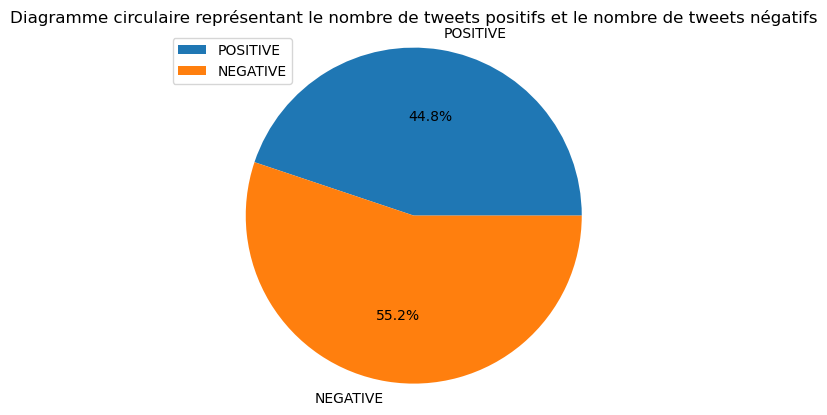

In [23]:
vals=df2['label'].value_counts()
if 'POSITIVE' not in df2['label'].values:
    pos=0
else:
    pos=vals['POSITIVE']
if 'NEGATIVE' not in df2['label'].values:
    neg=0
else:
    neg=vals['NEGATIVE']

valeurs = [pos, neg]
labels=['POSITIVE','NEGATIVE']
plt.pie(valeurs, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Diagramme circulaire représentant le nombre de tweets positifs et le nombre de tweets négatifs")
plt.legend(loc='upper left')
plt.show()

Ce code utilise Matplotlib pour tracer un histogramme représentant le nombre de tweets positifs et le nombre de tweets négatifs.

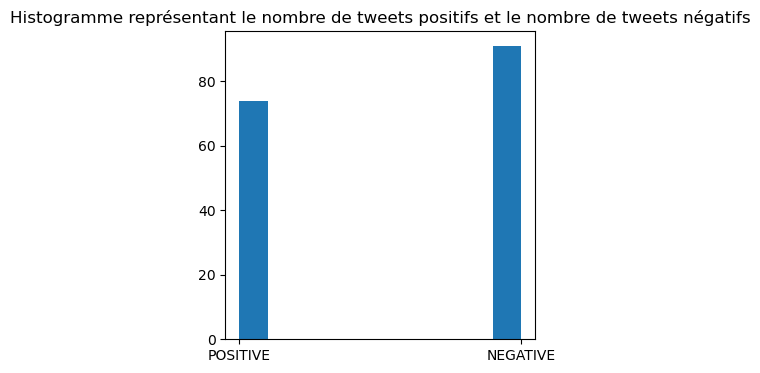

In [24]:
plt.figure(figsize=(4, 4))
plt.hist(df2['label'])
plt.title('Histogramme représentant le nombre de tweets positifs et le nombre de tweets négatifs')
plt.show()

In [25]:
somme_likes_negative = df2.loc[df2['label'] == 'NEGATIVE', 'likes'].astype(int).sum()
somme_likes_positive = df2.loc[df2['label'] == 'POSITIVE', 'likes'].astype(int).sum()

Diagramme circulaire représentant le nombre total de likes pour les tweets positifs et négatifs.

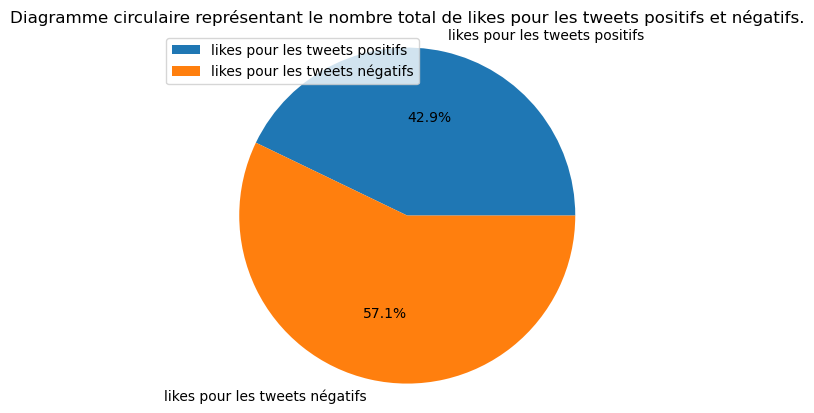

In [26]:
plt.pie([somme_likes_positive,somme_likes_negative], labels=['likes pour les tweets positifs','likes pour les tweets négatifs'], autopct='%1.1f%%')
plt.axis('equal')
plt.title("Diagramme circulaire représentant le nombre total de likes pour les tweets positifs et négatifs.")
plt.legend(loc='upper left')
plt.show()

In [27]:
somme_retweet_negative = df2.loc[df2['label'] == 'NEGATIVE', 'ret'].astype(int).sum()
somme_retweet_positive = df2.loc[df2['label'] == 'POSITIVE', 'ret'].astype(int).sum()

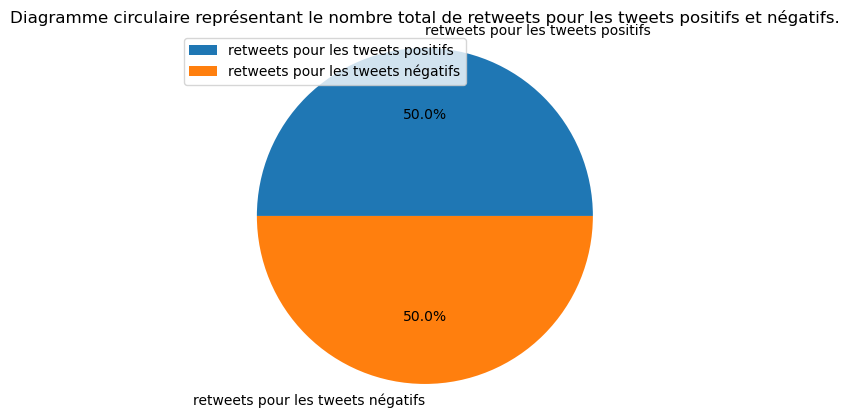

In [28]:
plt.pie([somme_retweet_positive,somme_retweet_negative], labels=['retweets pour les tweets positifs','retweets pour les tweets négatifs'], autopct='%1.1f%%')
plt.axis('equal')
plt.title("Diagramme circulaire représentant le nombre total de retweets pour les tweets positifs et négatifs.")
plt.legend(loc='upper left')
plt.show()